# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "File_CSV/reviewMallJakarta.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,Mall_name,name,rating,review
0,Blok M Square,Lav,5.0,I spent almost the entire day wandering throug...
1,Blok M Square,Jeremy Mseitif,3.0,Nice Mall with few old shops surrounding it. M...
2,Blok M Square,Agnes Szegedi,5.0,If you want the full Indonesian experience vis...
3,Blok M Square,La Umang,4.0,"The mall is fine, you can find a clothes or ju..."
4,Blok M Square,Dimas Jayasrana,4.0,This is the place if you want to have a sum up...


In [3]:
df.drop(columns = ['Mall_name', 'name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,5.0,I spent almost the entire day wandering throug...
1,3.0,Nice Mall with few old shops surrounding it. M...
2,5.0,If you want the full Indonesian experience vis...
3,4.0,"The mall is fine, you can find a clothes or ju..."
4,4.0,This is the place if you want to have a sum up...


# **Preprocessing Data**


<h2>Cleaning the text</h2>

In [4]:
import string
import re

In [5]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

<h2>Adding additional features - length of, and percentage of punctuations in the text</h2>

In [6]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct
0,5.0,I spent almost the entire day wandering throug...,i spent almost the entire day wandering throug...,1,226,2.7
1,3.0,Nice Mall with few old shops surrounding it. M...,nice mall with few old shops surrounding it m...,0,174,1.7
2,5.0,If you want the full Indonesian experience vis...,if you want the full indonesian experience vis...,1,119,1.7
3,4.0,"The mall is fine, you can find a clothes or ju...",the mall is fine you can find a clothes or ju...,1,204,3.4
4,4.0,This is the place if you want to have a sum up...,this is the place if you want to have a sum up...,1,404,5.7


<h2>Tokenization</h2>

In [7]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct,tokens
0,5.0,I spent almost the entire day wandering throug...,i spent almost the entire day wandering throug...,1,226,2.7,"[i, spent, almost, the, entire, day, wandering..."
1,3.0,Nice Mall with few old shops surrounding it. M...,nice mall with few old shops surrounding it m...,0,174,1.7,"[nice, mall, with, few, old, shops, surroundin..."
2,5.0,If you want the full Indonesian experience vis...,if you want the full indonesian experience vis...,1,119,1.7,"[if, you, want, the, full, indonesian, experie..."
3,4.0,"The mall is fine, you can find a clothes or ju...",the mall is fine you can find a clothes or ju...,1,204,3.4,"[the, mall, is, fine, you, can, find, a, cloth..."
4,4.0,This is the place if you want to have a sum up...,this is the place if you want to have a sum up...,1,404,5.7,"[this, is, the, place, if, you, want, to, have..."


<h2>Lemmatization and Removing Stopwords</h2>

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Rating,Review,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,5.0,I spent almost the entire day wandering throug...,i spent almost the entire day wandering throug...,1,226,2.7,"[i, spent, almost, the, entire, day, wandering...",spent almost entire day wandering different le...
1,3.0,Nice Mall with few old shops surrounding it. M...,nice mall with few old shops surrounding it m...,0,174,1.7,"[nice, mall, with, few, old, shops, surroundin...",nice mall old shop surrounding importantly top...
2,5.0,If you want the full Indonesian experience vis...,if you want the full indonesian experience vis...,1,119,1.7,"[if, you, want, the, full, indonesian, experie...",want full indonesian experience visit friday n...
3,4.0,"The mall is fine, you can find a clothes or ju...",the mall is fine you can find a clothes or ju...,1,204,3.4,"[the, mall, is, fine, you, can, find, a, cloth...",mall fine find clothes food food court basemen...
4,4.0,This is the place if you want to have a sum up...,this is the place if you want to have a sum up...,1,404,5.7,"[this, is, the, place, if, you, want, to, have...",place want sum jakarta youngster hype several ...


# **EDA**

In [10]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 210 rows and 8 columns
rating 1.0 = 1 rows
rating 2.0 = 3 rows
rating 3.0 = 14 rows
rating 4.0 = 73 rows
rating 5.0 = 119 rows


Number of null in label: 0
Number of null in text: 0


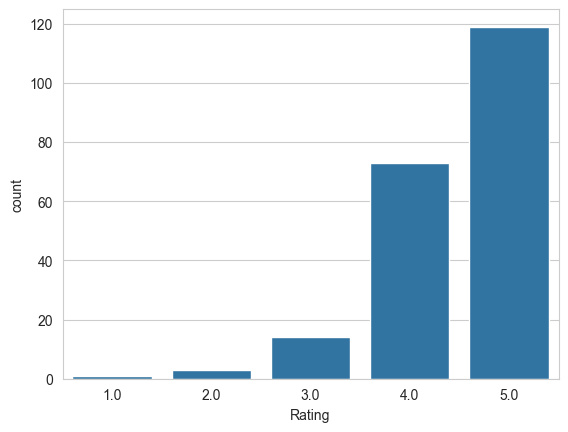

In [11]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum()}")
sns.countplot(x='Rating', data=df);

# **Visualizing Word Clouds**

In [12]:
from wordcloud import WordCloud

In [13]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

<h3><b>Word Cloud</b>: Positive Reviews</h3>

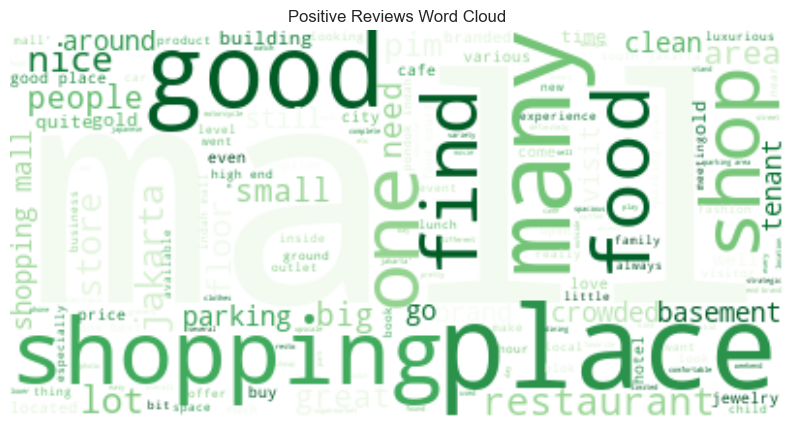

In [14]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

<h3><b>Word Cloud</b>: Negative Reviews</h3>

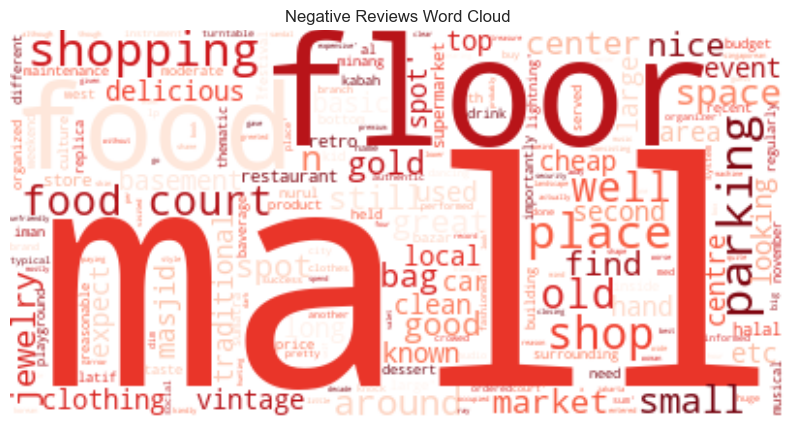

In [15]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# **Feature Extraction from Text**

*   Vectorizer : TF-IDF

In [16]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(210, 3)
(210,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 3)
(63, 3)
(147,)
(63,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()  

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493
0,175,6.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195170,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.244413,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.220848,0.0,0.0,0.0,0.00000,0.0,0.255009,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.267978,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.147125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.168901,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.204129,0.000000,0.0,0.0,0.244413,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.255009,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.284698,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.267978,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.209186,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,

# **Visualize Confusion Matrix**
*   Vectorizer : TF-IDF

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h3><u>Algoritma</u> : Multinomial Naive Bayes</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        59

    accuracy                           0.94        63
   macro avg       0.47      0.50      0.48        63
weighted avg       0.88      0.94      0.91        63



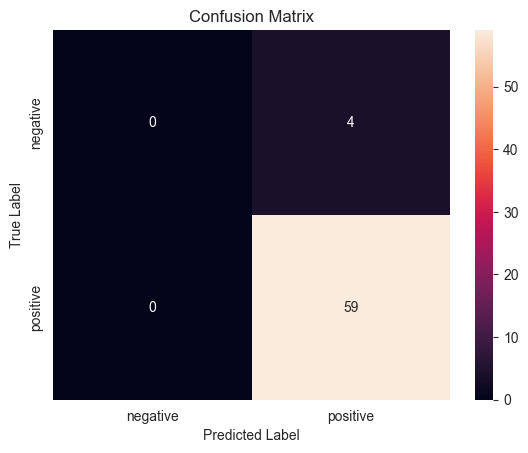

In [20]:
# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB()
# classifier.fit(X_train_vect, y_train)
# naive_bayes_pred = classifier.predict(X_test_vect)

# # Classification Report
# print(classification_report(y_test, naive_bayes_pred))

# # Confusion Matrix
# class_label = ["negative", "positive"]
# df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
# sns.heatmap(df_cm, annot=True, fmt='d')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert feature names to strings
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Random Forest Classifier</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        59

    accuracy                           0.94        63
   macro avg       0.47      0.50      0.48        63
weighted avg       0.88      0.94      0.91        63



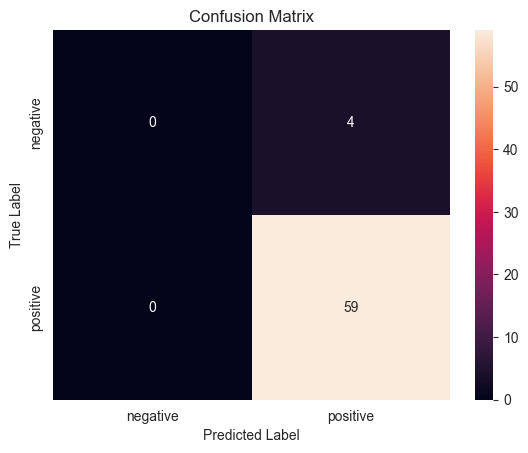

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Logistic Regression</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        59

    accuracy                           0.94        63
   macro avg       0.47      0.50      0.48        63
weighted avg       0.88      0.94      0.91        63



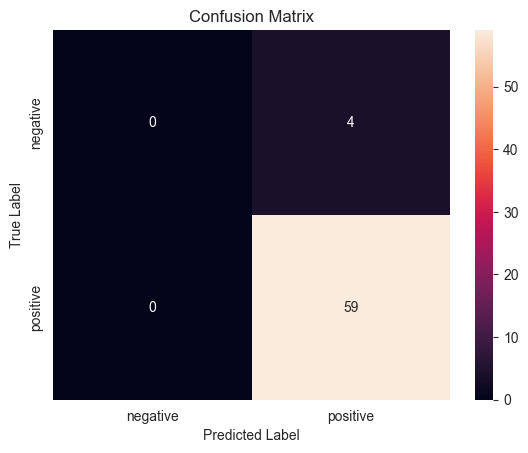

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Support Vector Machine (SVM)</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        59

    accuracy                           0.94        63
   macro avg       0.47      0.50      0.48        63
weighted avg       0.88      0.94      0.91        63



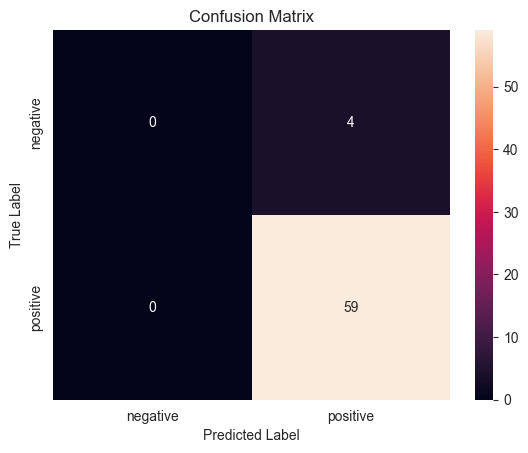

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: K-Nearest Neighbor (KNN)</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      0.95      0.94        59

    accuracy                           0.89        63
   macro avg       0.47      0.47      0.47        63
weighted avg       0.87      0.89      0.88        63



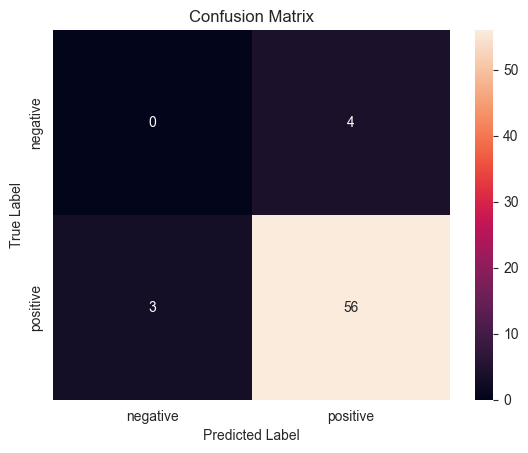

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Extra Trees Classifier</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        59

    accuracy                           0.94        63
   macro avg       0.47      0.50      0.48        63
weighted avg       0.88      0.94      0.91        63



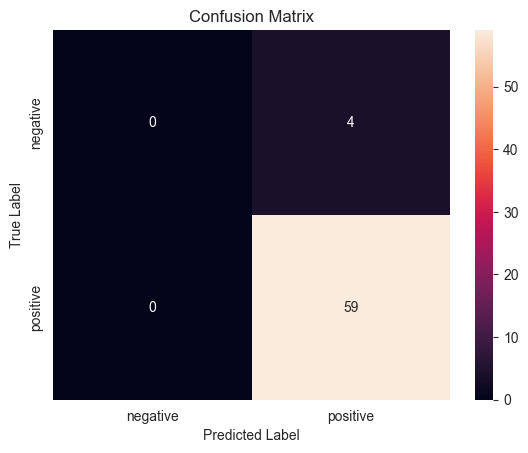

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Performing K-Fold Cross Validation**

In [26]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes


 accuracy - 0.9052380952380952 
 precision - 0.9052380952380952 
 recall - 1.0 
 f1 - 0.9499726327312535 

Logistic Regression
 accuracy - 0.9052380952380952 
 precision - 0.9052380952380952 
 recall - 1.0 
 f1 - 0.9499726327312535 

Random Forest
 accuracy - 0.9052380952380952 
 precision - 0.9052380952380952 
 recall - 1.0 
 f1 - 0.9499726327312535 

SVM
 accuracy - 0.9052380952380952 
 precision - 0.9052380952380952 
 recall - 1.0 
 f1 - 0.9499726327312535 

KNN
 accuracy - 0.8914285714285715 
 precision - 0.9037362637362637 
 recall - 0.9846153846153847 
 f1 - 0.9420157747743956 

Extra Trees
 accuracy - 0.8985714285714286 
 precision - 0.9042857142857142 
 recall - 0.9923076923076923 
 f1 - 0.9460043787629996 



# **Predictions**


*   <u>Vectorizer</u> : CountVectorizer (Bag of words)
*   <u>Algoritma</u>  : Multinomial Naive Bayes

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [28]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8888888888888888

In [29]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1]








---

*   <u>Vectorizer</u>: TF-IDF
*   <u>Algoritma</u>: Extra Trees Classifier

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9365079365079365

In [31]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[1 1 1 1]
